## Irregularities in the 2019 Hungarian European Parliamentary election data, supported by 2018 and 2014 data

#### Working Draft Version 0.1

#### János Brezniczky
#### 25/06/2019

### Abstract

Human craft work tends to leave a trace of unevenness on impacted numeric data, for instance, humans are an imperfect source of random numbers. Certain values tend to be avoided, those of last digits are no exception. Such behaviour can be analytically examined.

A quick analysis of the recent (2019 European Parliamentary) Hungarian electoral data is found to show a convincing degree of anomaly which is detailed herein. The analysis is focused on the numbers of the winning party - since these numbers are the biggest, and thus would be expected to have the most uniform last digit distribution, the properties of which being the subject of the below verifications.

The examination of the 2019 European Parlamentiary Election results alone shows a 97% unlikeliness after focusing on the top 20 settlements which were identified as the most likely "oddball" candidates through certain heuristics.
In this case the verification is not entirely restricted to these, but a full scale Monte-Carlo simulation takes place replacing each vote count with a uniform random value. The extremities obtained via identical steps leading to the aforementioned top 20 candidates are rarely found to be (approx. 3%) as extreme as in case of the actual data.
(Without focusing on the top 20, the likeliness increases to some sub-6% value, this is not detailed below.)

Individual settlement results can also be highlighted via comparing the 2018 and 2019 last digit distribution entropy and leveraging that the last digits should independently vary in such characteristically different electoral settings (for instance, the turnout has been 70.22% in 2018 at 7 pm [1], whilst only 43.48% at the same time in 2019 [2]). Certain larger settlements appear to have been treated less accurately than others.

An additional inclusion of 2014 results further broadends the scope, pointing the finger on 44 areas with a 5% probability left for error, where some anomaly is likely to have occurred at least once during the three elections.

Although no effort has been made to reach beyond this degree of potential suspicion, a number of ways in which further examinations could be carried out will be explained. The above does not necessarily imply forgery, natural human mistakes would be expected to leave such marks on numeric data as well, and we could similarly expect some degree of random discrepancy, yet any of these underlines that certain quality improvements are likely desirable.

### The 2019 data

A brief summary of the findings (about the likeliness of the "top 20" total last digit Fidesz votes entropy wandering this far from their typical values) where the Fidesz party has received at least 100 votes in each ward is as on the below chart.

The histogram depicting the simulations' results does not seem to suggest that this is realistically a clean (distributionwise uniform) situation. The entropy drops fairly low, corresponding with a less than 6% probability in all examined cases, and particularly < 2% for the top 20 candidates. This may however be down to a handful of settlements with highly obscure results.

The relevant data/code can be found taking a look at the app5_... files.

In [1]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]

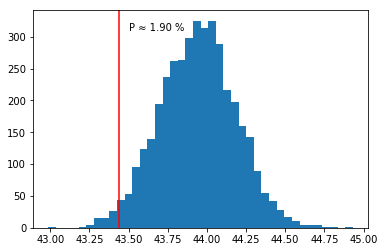

In [2]:
from app5_ent_in_top import plot_entropy_distribution

plot_entropy_distribution()

It is also possible to utilize later results of the project and describe the log likelihood distribution based likeliness of the top 20 actual values assuming that the last Fidesz party vote count digits are uniformly distributed in case of sufficiently sizable settlements as the null hypothesis.
This is expected to be a more accurate probability due to sorting and comparability issues in case of the earlier entropy values (due to the varying settlement ward counts) whilst here the individual settlement p-values better conform with each other.

A p-value of 2.82% allows to reject it with a 5% significance level:

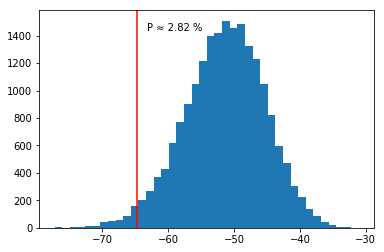

In [3]:
import app9_overall_log_likelihood as app9

app9.plot_summary()

While this is not necessarily a very stark result - depending on what claims we are trying to make or hypotheses to test - this certainly suggests that there is a reason for suspicion, and it is worth being kept in mind that people normally try to correct the traces of inaccuracies - the valid vote count could be adjusted accordingly, numbers could be made up (think of a lazy vote counter) with care; and that the signal can often disappear in the noise, examining a too big area or too big group of parties may be counterproductive when trying to localize offending numbers.

Whatever findings to come, may be a visible tip of an iceberg.

### Comparing the 2018 and 2019 election data

Using more data tends to allow to obtain a more detailed picture. These elections are so close in time that we can rightly expect correlated irregularities, and where there is suspicion of that, similarly to take place in the other year.

A comparative analysis of the empiric last digit distributions of data from the two most recent elections did not identify repeat problems with a 95% confidence, however, the suspects can be listed out in decreasing likeliness. Also, from the probabilities we may suppose that 14 ($\sum p_i$=14.36..) of the below 20 suffer from discrepancies in conveying the true numbers.

#### Top suspects for irregularities in both years

Based on vote count last digit entropy values, the most incorrect-looking settlements, with their respective mutual incorrectness probability for 2018 and 2019 (%), their correctness probability individually for 2019 and 2018 are:

In [4]:
import app6_comparative as app6

(df_comparative, suspects, 
 df_comparative_sorted_by_both, suspects2, 
 df_comparative_sorted_by_all_3, suspects3) = app6.load_results()

suspects2["p_both_incorr_%"] = suspects2["p_both_incorr"] * 100

suspects2[["Settlement", "p_both_incorr_%", "p_2019", "p_2018"]]


,Settlement,p_both_incorr_%,p_2019,p_2018
0,Tata,94.916295,0.0427,0.0085
1,Balatonfüred,93.350995,0.0395,0.0281
2,Fót,90.833224,0.0101,0.0824
3,Eger,83.660361,0.0453,0.1237
4,Budapest XVI. kerület,74.931360,0.0772,0.1880
5,Mezőtúr,74.402596,0.1998,0.0702
6,Veresegyház,73.818450,0.1998,0.0775
7,Berettyóújfalu,72.978528,0.2664,0.0052
8,Vecsés,69.422220,0.0004,0.3055
9,Dunaföldvár,67.401178,0.3006,0.0363


#### Top suspects for some irregularity in at least one of the 2018 and 2019 (EP) elections

On the other hand, naturally, the number of cases where at least one of the results looks suspicious (i.e. it is significantly unlikely, < 5%, that both would be 'regular'), is greater than that of the cases where only the 2019 results appeared odd (not detailed here), and yields a crisper view, once 2018 values had been taken into account.

Note that the limiting p-value below is 0.1 i.e. the list is cut off at 10%.

In [5]:
suspects["p_both_correct_%"] = suspects["p_all_2"] * 100
suspects[["Settlement", "p_both_correct_%"]]

,Settlement,p_both_correct_%
0,Vecsés,0.012220
1,Tata,0.036295
2,Fót,0.083224
3,Balatonfüred,0.110995
4,Berettyóújfalu,0.138528
5,Pécel,0.174720
6,Eger,0.560361
7,Budapest XV. kerület,0.817668
8,Mezőkövesd,0.943138
9,Dunaföldvár,1.091178


#### Top suspects for some irregularity in at least one of the 2014 general, 2018 general(? TODO: check!) and 2019 (EP) 

Involving one more year's generic eletion data plausibly further increases the number of suspect locations.

Below the probability for instance next to Eger (second column) means that there is a 0.55% chance (~ 1:180) that the values are regular in all three cases, i.e. nothing unusual took place that would have otherwise affected the uniform distribution of the last digits.

In [6]:
suspects3["p_all_3_%"] = suspects3["p_all_3"] * 100 
suspects3[["Settlement", "p_all_3_%", "p_2014", "p_2018", "p_2019"]].loc[suspects3["p_all_3_%"] <= 5]

,Settlement,p_all_3_%,p_2014,p_2018,p_2019
0,Vecsés,0.010415,0.8523,0.3055,0.0004
1,Tata,0.013959,0.3846,0.0085,0.0427
2,Berettyóújfalu,0.036904,0.2664,0.0052,0.2664
3,Püspökladány,0.043300,0.0008,0.7237,0.7479
4,Balatonfüred,0.053966,0.4862,0.0281,0.0395
5,Fót,0.054121,0.6503,0.0824,0.0101
6,Mezőkövesd,0.061870,0.0656,0.0101,0.9338
7,Veresegyház,0.065345,0.0422,0.0775,0.1998
8,Pécel,0.159764,0.9144,0.3360,0.0052
9,Kerepes,0.205890,0.0281,0.4862,0.1507


Is there really a bit of room for suspicion? Looking into e.g. the Balatonfüred data just slightly deeper - particularly the 2019 EP result for 4 (ex-?)major parties (Fidesz, Jobbik, DK, Momentum) reveals that the numbers do not seem to get any less irregular - just by the eye it is easy to spot that 4 never appears.

A quick plot consistently appears to show an odd distribution.

The corresponding p-value is 1.61% - note that it is a remarkable drop from the original 2019 probability, 3.95%.

cdf for 32 was generated
p = 1.61 %


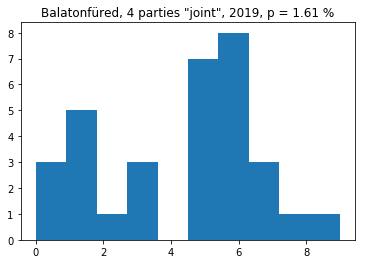

In [7]:
from preprocessing import get_preprocessed_data
import matplotlib.pyplot as plt
import numpy as np
from digit_entropy_distribution import get_entropy, prob_of_entr

df_2019 = get_preprocessed_data()
df_2019[df_2019.Telepules=="Balatonfüred"][["Fidesz", "Jobbik", "DK", "Momentum"]]

digits_Balatonfured = np.concatenate(df_2019[df_2019.Telepules=="Balatonfüred"]
                                     [["Fidesz", "Jobbik", "DK", "Momentum"]].values % 10)

plt.hist(digits_Balatonfured, bins=10)

p_Balatonfured = prob_of_entr(len(digits_Balatonfured), get_entropy(digits_Balatonfured))

print("p = %.2f %%" % (p_Balatonfured * 100))

plt.title("Balatonfüred, 4 parties \"joint\", 2019, p = %.2f %%" % (p_Balatonfured * 100))

plt.show()

### The 2014 data: Fidesz, Fidesz and Jobbik

The 2014 data yields a handful of candidates when only looking at the Fidesz vote counts alone.

#### Top 2014 candidates for irregularity in the number of Fidesz votes

In [8]:
import app6_comparative as app6


df_comparative, _, _, _, _, _ = app6.load_results()
df_comparative.reset_index(inplace=True)
df_comparative[["Settlement", "p_2014"]][(df_comparative.p_2014 < 0.05) &
                                         (df_comparative.count_2014 >= 8) &
                                         (df_comparative.min_votes_2014 >= 100)] \
              .sort_values(["p_2014"])

,Settlement,p_2014
518,Püspökladány,0.0008
64,Derecske,0.0027
92,Kerepes,0.0281
95,Kisújszállás,0.0281
223,Érd,0.0301
82,Budapest II. kerület,0.0317
556,Budapest XI. kerület,0.0333
411,Budapest IX. kerület,0.0411
30,Veresegyház,0.0422


The entropy based verification tends to be more reliable over more sizable areas. There are 3 of the districts of the capital listed above. It is at least an interesting coincidence (?) that according to [3] two of those, namely the Budapest XI. and IX. districts (kerület) have seen Fidesz conquering an extraordinarily faint victory in that year (~2..5% ahead of the second candidate).

#### The top 2014 candidates based on common irregularities in the number of votes of Fidesz and Jobbik

Should the values be affected by some 'anomaly', assuming it is a consistent anomaly - a common habit, or "hand" - this should leave, albeit stochastic, consistent marks on the data.

Since both the Fidesz and Jobbik parties frequently received numerous votes on this occasion, the Jobbik party vote last digits should also lend themselves for uniformity checks in several cases. (In case of small values, say in the range of 1..10, a downward bias is expected, as large values become less likely and this is reflected in the last digit - since that is the only digit. But as the values increase, this effect is expected to fade out.)
Here a little relaxation of the number of votes constraint was applied, the minimum for Jobbik votes was 50 instead of 100 - the norm above.

In [9]:
import app7_fidesz_vs_jobbik as app7


_, suspects = app7.load_results()
suspects


,Telepules,min_votes,Korzet_count,entropy,p
0,Budaörs,52,40,2.095817,0.0834
1,Bátonyterenye,57,30,1.985231,0.0448
2,Edelény,120,16,1.771016,0.0868
3,Kerepes,100,16,1.721402,0.0541
4,Pomáz,54,32,1.956679,0.0141
5,Pásztó,54,18,1.798106,0.0639
6,Püspökladány,118,32,1.879748,0.0020
7,Szeged,50,218,2.264374,0.0586
8,Szigethalom,82,32,2.018515,0.0560


This comparison of the distribution of the then leading two parties, Fidesz and Jobbik, suggests that the Szeged (one of the larger cities in Hungary, representing about 1.6% of the population) area could have really deserved some close attention - whether or not certain suspect efforts (if any) have reached their goal.

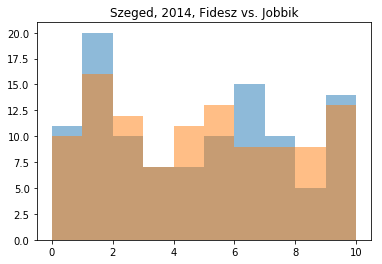

In [10]:
import AndrasKalman.load

AndrasKalman.load.plot_location("Szeged")

### Irregularity in consecutively repeating last digits in the data sets

Another way of finding traces of human bias (whether it is unintentional) among the digits is to find how often the last digits of consecutive numbers match and employ some statistic on this frequency. Such repetitions apprently takes place with a surprising frequency in some cases.

#### The top candidates (at most 10% likeliness of regularity) for 2019

In [11]:
import app8_prob_of_twin_digits as app8

app8_df, app8_suspects = app8.load_results()

app8_df[["Telepules", "p_ld_Fidesz_twins_2019"]].loc[
    (app8_df["p_ld_Fidesz_twins_2019"] < 0.1) &
    (app8_df["n_wards_2019"] >= 8) &
    (app8_df["min_Fidesz_votes_2019"] >= 100)
].sort_values([
    "p_ld_Fidesz_twins_2019"
])

,Telepules,p_ld_Fidesz_twins_2019
0,Eger,0.000979
5,Maglód,0.005753
46,Tapolca,0.053725
3,Gyömrő,0.065642
100,Veresegyház,0.065642
95,Debrecen,0.096451


#### The 2018 candidates

Interestingly, the 2018 candidates are more numerous:

In [12]:
app8_df[["Telepules", "p_ld_Fidesz_twins_2018"]].loc[
    (app8_df["p_ld_Fidesz_twins_2018"] < 0.1) &
    (app8_df["n_wards_2018"] >= 8) &
    (app8_df["min_Fidesz_votes_2018"] >= 100)
].sort_values([
    "p_ld_Fidesz_twins_2018"
])

,Telepules,p_ld_Fidesz_twins_2018
2,Berettyóújfalu,0.018576
13,Százhalombatta,0.018576
43,Dabas,0.018576
39,Baja,0.038804
97,Hajdúsámson,0.047423
64,Budapest V. kerület,0.052653
120,Budapest XXII. kerület,0.073273
29,Budapest XVI. kerület,0.077212
15,Komárom,0.078813
66,Budapest XXI. kerület,0.091575


The top suspects which are unlikely (at most 5% likely) to be regular in each of 2019, 2018 and 2014 in this respect are listed below.

In [13]:
app8_suspects[["Telepules", "p_all_regular"]]

,Telepules,p_all_regular
0,Eger,0.000399
1,Berettyóújfalu,0.000947
2,Gyömrő,0.002399
3,Maglód,0.002896
4,Százhalombatta,0.006381
5,Komárom,0.006838
6,Budapest XVI. kerület,0.009246
7,Püspökladány,0.009748
8,Kerepes,0.012220
9,Balatonfüred,0.012220


### Further results

These resulted from trying to examine a weakness in the above - that it is not deeply verified how stable the above are against slight deviations from the assumed uniform distribution. However, the effort at determining the distribution by regressing a line on the histogram resulted in poor model diagnostics, and during a deeper look the below was found.

#### Other last digits

The below two charts provide an overview of the last digit distributions as well as the vote count distributions per certain last digits.

In [14]:
import app10_distribution_of_digits as app10

plt.rcParams['figure.figsize'] = [15, 10]

app10.plot_digit_distributions()

SyntaxError: invalid syntax (app10_distribution_of_digits.py, line 146)

In [ ]:
app10.plot_9_to_7_digit_distributions()

The first chart depicts similarly balanced distributions for 
* party votes of Fidesz, DK, Jobbik and Mi Hazank
* "Evenyes", the valid votes

The second chart shows how often the various vote count ranges encountered digits of 9 (blue bars) and 7 (orange bars). Whilst 9 was often found to be overly preferred, 7 often seemed to be avoided, hence the choices.

Why is this interesting? Where the distribution is increasing while moving towards positive infinity horizontally, we could sensibly expect more numerous bigger digits to appear than smaller digits (on the charts, this would be taller orange bars than blue bars). The digit frequency should more generally likely follow something akin to a Zipf-distribution, making smaller numbers more frequent than larger ones. This could fade out the aforementioned 'uphill' behaviour.

Where the two tendencies are much less likely to cancel each other out, is the right hand side - when on the decline, slightly more smaller digits should appear than bigger.

This consideration accords with most charts, except those of the Fidesz, and the "Ervenyes" (valid votes) chart.


These suggest that it should be worth looking into the numbers of primarily both of the top two parties, Fidesz and DK, as well as the valid vote count. Furthermore, given the flatness of the Jobbik party digits, perhaps ask the question - has some anomaly affected the Jobbik party votes, and has any 'consistency maintenance' been perhaps carried out on the valid vote counts, to leave fewer loose ends?

Another tendency to expect is that the digit distributions go hand in hand, should be unlikely to deviate away from each other much. This is again seems fulfilled neatly, except perhaps for (again) the Fidesz and the valid votes charts.

#### An order of magnitude speculation

Having a second look at the Fidesz vote count by digit distribution chart may allow for taking one very rough guess about the potential magnitude of mishaps with the numbers.

Given that there are about 100 extra wards (vote counts ending in a 9) in excess of those ending in 7, unexpectedly, after the maximum of the chart, we can say something like 100 x 200 = 20,000 votes could be affected.

However, it quickly increases once we factor in that there are other digits to expect weird behaviour from.

What does the situation look like?

In [ ]:
app10.plot_party_vote_by_digit_relationships("Fidesz", max_votes=500)

Assuming - very speculatively - that those 'outlying' bars at the top all represent some mishap, but in turn ignoring the right side of the 8/9 charts, we can "by the eye" estimate:

In [ ]:
(20 * 4 + 20 * 3 + 15 * 4 +
10 * 3 + 10 + (30 + 10 + 5 + 20) +
20 + 25 + 25 * 2) * 175

votes. Probably it is not 100% different from the true values, but what might be at stake is staggering, since although the total number of votes was recorded at 3.47M, this is about 3.8% of all the Fidesz votes, or of the same magnitude that some parties received in total (still reqiures further efforts to come up with a likely value, if possible), which is about the power to take away a mandate or give one. And again, it might be nothing, but can just as well be a tip of an often better camouflaged iceberg.

For comparison here are the results of the party receving the second largest number of votes, the DK.

Note that here
* the orange bars almost never "beat" the blue ones on the right hand side for the 8 and 9 digit plots
* there are no abrupt "outbreaks" such as in case of the Fidesz 8 and 9 charts around 120 and 180, respectively, let alone what happens in case of the 5s
* these charts are already magnified along the horizontal axis, and still appear to be much more regular

(The equivalent charts for the rest of the parties show up even more regular, for more details see/run the app10... python module.)

In [ ]:
app10.plot_party_vote_by_digit_relationships("DK", max_votes=200)

### Has the choice of threshold affected the Fidesz votes last digit distribution?

A self test should also be carried out for peace of mind.
The below chart shows how much it matters if a random noise is added when deciding which settlements are sufficiently large for hypothesizing a uniform distribution. If it starts at 100 (as it normally does) 0 digits might creep in.
The below charts show (both contain 10 replots each with a different random 10-wide boundary noise added) hardly any difference it makes whether this boundary is sharply placed at 100 or in a more blur, 95..105 way, without or with respecting the $ward count \ge 8$ constraint (the impact is the hardly visible vertical blur on the charts):

In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]
app10.plot_Fidesz_digits_sensitivity_to_cutoff()

### Methodology

The methodology is based on that for large enough vote counts, the last digit values can be considered i.i.d. uniformly distributed choices of the 10 possible digits.
Originally some home made metric ((n_{most frequent digit} - n_{least frequent digit}) / (n_{total  digits}) was used to see how big the fluctuation in digit distributions is. However, while it was pointing towards largely the same geographic areas, and helped with the beginnings of the exploration, it can be fragile and non-standard, so a different, more mature one forms the basis of statistics.

#### Simulation

One relatively larger scale simulation was kept for the report at this stage (see the app5... module). It is rather slow and surely could be multithreaded/processed and otherwise accelerated (C, C++, ignoring unused values), but keeping it simple (at the cost of being slow) reduces the likeliness of errors creeping in and allows to reflect the thinking that lead to the algorithm. The concept here is to inject randomly generated last digits into the electoral ward vote numbers (for the Fidesz party only) and to examine what distribution of overall entropy (sum of individual entropies) they yield for the top x (ended up being 20) suspects, thereby becoming able to obtain a p-value for the actual data.

While creating this simulation did it become evident that entropy on its own is not an easily utilizable metric for comparing short sequences of varying length in terms of extracted source entropy. For instance, it would attach the same scores to the sequences [1, 2] and [1, 1, 2, 2], despite that the first is maximized and the second is unusually redundant given the draws in our case come from 10 elements.

The problems experienced while sorting have led to the construction of the entropy p-values, technically p-values of the possible entropy levels of a multinomial distribution depicting possible outcomes of n draws of 10 elements.

The items in the simulation were left ranked in ascending entropy order in the first case (app5). Utilizing the below p-values could almost surely improve on the quality of the findings here - see the app9... files, and the below paragraphs for more information.

#### Entropy p-values

The standard information entropy (python scipy.stats.entropy) formula is used [6]:


$${\displaystyle \mathrm {H} (X)=-\sum _{i=1}^{n}{\mathrm {P} (x_{i})\log _{b}\mathrm {P} (x_{i})}}$$

(where the $b=e$, i.e. $log_b$ is $ln$). This is probably much better-known and if in the need of improving the accuracy of the report e.g. in case of doubt, it should allow for constructing more convincing arguments based on existing, mature mathematical results, rather than a home made metric.

Entropy can be understood as a measure that typically reduces when the numbers become more inhomogeneously distributed to the eye. Also, while it is "neutral" towards human preference for certain digits (e.g. 0 is both expected and often appeared to be an unreasonably frequent one), it already shows convincing signs of discrepancies.

It was for in this respect intentionally ignored that people have an attraction to certain digits (classic "lucky numbers"), as on the one hand cultural nuances may vary geographically within the country, on the other the analysis aims for 'good willed' estimates of discrepancy probabilities. The benefit of that is leaving some room for error: the results should be more likely to hold with this approach, perhaps in part, once correcting for human mistakes - should any come to light in the future.

#### Entropy and simulations

Whilst individual entropy p-values are interesting, and can reflect on where the problem, if any, may be concentrated, it is a good idea to confirm their overall significance given the bigger picture. Any rare event will happen occasionally if we are to sample long enough, and while there are apparently well more than one < 5% events, there are over 3100 settlements involved - it is always a good idea to confirm, perhaps in this way, whether it is anything really unusual that seems to have been localized, or it is simply large numbers at play.

Entropy values were combined together to describe the overall likeliness via a likelihood function as well. This measure here is calculated as the logarithm of the individual settlement probabilities added up. A simulation (with four random seeds) is taking place to obtain a sample of these from uniform last digit distributions for settlements that are sufficiently large. The distribution is then used as the basis of determining a p-value for the log likelihood value of the actual data.

#### Twin digits

This has been verified using Poisson distribution p-values. [7]
The associated probability value was the $P(repeats \ge actual repeats)$.


### About the political significance of the results

The Hungarian elections have kept warranting the Fidesz party a "2/3" governing position. This distinguished majority has allowed the party to carry out modifications of very high importance without confirmation from the opposition, rendering them speaking puppets in the Parliament.

However - interestingly, by coincidence - this has kept being a very fragile "2/3". Even the loss of a single parliamentary mandate would have broken this fragile "2/3" position (result of 49.27% of the votes in 2018 [1]). Fidesz has barely hit the threshold in 2014 and 2018.

Could they have gained this effectively huge advantage by - perhaps repeat, "administrative mistakes"?

### Personal connection with the issue

The author has been confronted with the situation in Eger on multiple occasions for various bonds with the area. In certain wards, people feel like as if they have almost never seen an actual, living Fidesz voter. And yet, they are the majority. Isn't it strange?
Eger has come out (without particular intention) as a likely candidate for tampering on multiple occasions in the above, especially in 2019.
The motivation for the analysis was that it was difficult to miss a "poker" of numbers ending with 9's among the 2019 Fidesz votes in Eger - so it seemed the quality of err... data processing has become worse.
The author also personally visited a certain ward in said settlement and his inquiry about the presence of opoosition delegates was not 'too well received'.


### Conclusion and further steps

This analyis has/had multiple aims, some were realized as a potential side benefit along the way.

First, the author was curious whether there is actual evidence of tampering in the data - can anything significant be found? Apparently, yes.

The above shows some awkward digit distributions in each considered year.

Simulations confirm that the 2019 data is unlikely to be "regular", unaffected by biased digit choices.

Certain settlements/cities come up (e.g. Tata, Eger, Veresegyház, Érd, Pécel, Pomáz, Fót, Berettyóújfalu, Balatonfüred), even regularly, as very likely candidates for closer inspection, and this should not be missed.

#### Futher aims

Beyond the first aim, second, to draw attention of international bodies on the problem of, to say the least, election data processing in Hungary.
This time it was EP votes at stake, and the EU (for instance, the OSCE) should be watching, closely.
On the other hand, everyday people are allowed to inspect the voting process, and we should, too.

The 2019 elections are coming soon, and we should go prepared. The report should help motivating this.

Third, to suggest particular geographical areas which may deserve a closer attention next time there is an election.

Fourth, to demonstrate methods for further verification of past _Hungarian election data_.
In the above, there is room for simulation based checks on both the 2014 and 2018 data. This should be easy - little does the structure of the wards change, it is almost, if not exactly, the same problem as with the 2019 numbers (see app5...).
But there is also room for checking on the digits from multiple parties together, as it happened in case of the Fidesz and Jobbik in 2014 above, or for Balatonfüred in 2019.

Then, to demonstrate methods for further verification of past election data on an _international scale_.
Not only on grounds of suspicion about others' work - it would be very interesting to find out whether the above discrepancies are typical for some innocent reason rather than anything to be nosy about - i.e. to see if the above suffers from methodological or conceptual issues. (But also on grounds of suspicion :) )

Fifth, it could and should be hypothesized or possibly investigated whether in the suspect locations any party was likely to benefit from the discrepancies.

Sixth, there is a lot more data! There were not only general elections to refer to and compare against, even in the years 2014 and 2018. More data could lead to hopefully more convincing and more detailed findings.

The author expects that a framework (such as a Python package, combined with a standardised format for voting data) for such analyses could be very welcome by a broad range of experts and democrats - democracies will not work without ensuring that the processes are properly put in place, and this means repeat checks. The distributions above were examined in a non-parametric style, reference distributions or functions to deal with the respective PMFs should be a welcome part.

The author hereby makes a commitment to improve on what the above provides in case of interest, and also wishes good luck to those digging deeper, irrespective of what their - hopefully correct! - findings may be.

Then, a major TODO: the data received indirectly needs to be verified against data in at the source from which it was scraped.


### The author's personal opinion

My opinion - obviously, it is only my best bet - is that there is a systemic fraud in Hungarian elections, which other reports have already reflected on from perspectives typically different from the above, which is signified by the above, and which should cease to exist as soon as possible.
Not only are the electoral processes unfair, an unelected government is illegitimate, and particularly their policies reliant on the "2/3 majority" should be revoked, the people contributing to the fraud should be trialled.

We, the people, should never accept the ruling of an illegitimate, fraudulent government. Such leaders should be deprived from their position  and held accountable whatever force it takes.

### Acknowledgements

For the data, thanks go to:

* Platón Party  (2018 and 2019) [4]
* András Kálmán (2014) [5]


### References

[1] [https://en.wikipedia.org/wiki/2018_Hungarian_parliamentary_election](https://en.wikipedia.org/wiki/2018_Hungarian_parliamentary_election)

[2] [https://en.wikipedia.org/wiki/2019_European_Parliament_election_in_Hungary](https://en.wikipedia.org/wiki/2019_European_Parliament_election_in_Hungary)

[3] [https://hu.wikipedia.org/wiki/2014-es_magyarorsz%C3%A1gi_%C3%B6nkorm%C3%A1nyzati_v%C3%A1laszt%C3%A1s](https://hu.wikipedia.org/wiki/2014-es_magyarorsz%C3%A1gi_%C3%B6nkorm%C3%A1nyzati_v%C3%A1laszt%C3%A1s)

[4] [https://www.facebook.com/platonpart/](https://www.facebook.com/platonpart/)

[5] [https://www.kaggle.com/akalman/hungarian-parliamentary-elections-results](https://www.kaggle.com/akalman/hungarian-parliamentary-elections-results)

[6] [https://en.wikipedia.org/wiki/Entropy_(information_theory)](https://en.wikipedia.org/wiki/Entropy_(information_theory))

[7] [https://en.wikipedia.org/wiki/Poisson_distribution](https://en.wikipedia.org/wiki/Poisson_distribution)